In [2]:
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
import numpy as np
from matplotlib import pyplot as plt
from qiskit.quantum_info import Statevector

In [3]:
omega = np.exp(2*np.pi*1.j/3)
Z = [[1, 0, 0, 0], [0, omega, 0, 0], [0, 0, omega*omega, 0], [0, 0, 0, 1]]

In [5]:
Z

[[1, 0, 0, 0],
 [0, np.complex128(-0.4999999999999998+0.8660254037844387j), 0, 0],
 [0, 0, np.complex128(-0.5000000000000003-0.8660254037844384j), 0],
 [0, 0, 0, 1]]

In [6]:
from qiskit.synthesis import TwoQubitWeylDecomposition

In [7]:
ZgateQutrit = TwoQubitWeylDecomposition(Z).circuit()

In [13]:
X = [[0,0,1,0], [1,0,0,0], [0,1,0,0],[0,0,0,1]]

In [14]:
XgateQutrit = TwoQubitWeylDecomposition(X).circuit()

In [15]:
def A(n):
    Aqc = QuantumCircuit(2)
    Aqc.append(XgateQutrit, [0, 1])
    for i in range(n):
        Aqc.append(ZgateQutrit, [0, 1])
    return Aqc

In [16]:
observable = [[A(0), A(0), A(0)], [A(0), A(0), A(1)], [A(0), A(1), A(0)], [A(0), A(1), A(1)], [A(1), A(0), A(0)], [A(1), A(0), A(1)], [A(1), A(1), A(0)], [A(1), A(1), A(1)]]

In [17]:
circuits = []

for i in range(8):
    tc = QuantumCircuit(6)
    for j in range(6):
        tc.reset(j)
    tc.append(observable[i][0], [0, 1])
    tc.append(observable[i][1], [2, 3])
    tc.append(observable[i][2], [4, 5])
    circuits.append(tc.decompose().decompose())

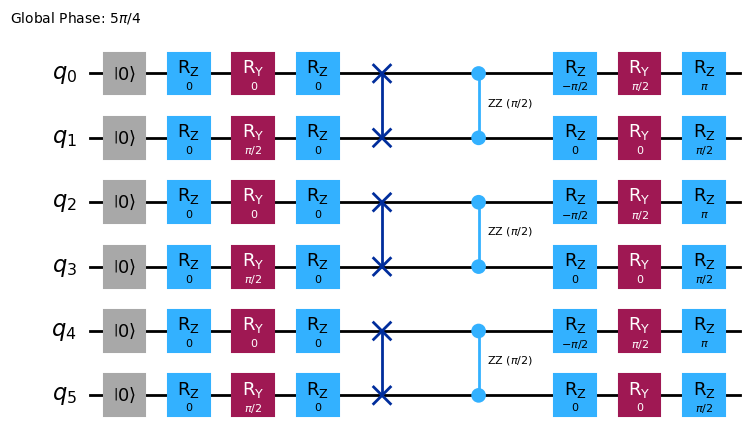

In [18]:
circuits[0].draw('mpl')

In [1]:
from QuditsOnQubits import QuditsOnQubits

In [2]:
ghz_circ = QuditsOnQubits()

TypeError: 'module' object is not callable